# Lab Assignments: Set A

In [ ]:
#1. Write a python program to implement following classification algorithms on a given Dataset:
#i. Naïve Bayes algorithm (Use Social_Network_Ads.csv)

Naïve Bayes Accuracy: 0.93

Classification Report for Naïve Bayes:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100


Confusion Matrix for Naïve Bayes:
 [[61  2]
 [ 5 32]]


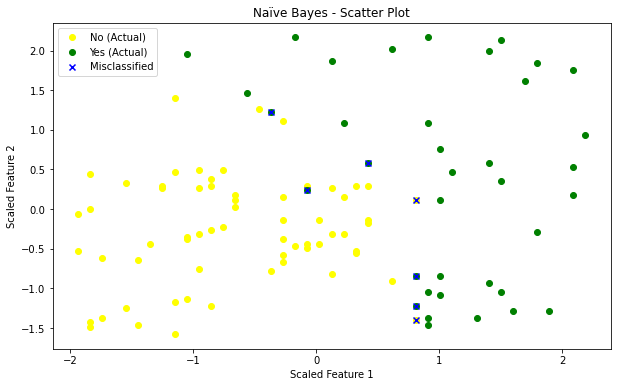

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# Select relevant features and target variable
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling for better visualization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Naïve Bayes algorithm
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)
naive_bayes_predictions = naive_bayes_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, naive_bayes_predictions)
classification_rep = classification_report(y_test, naive_bayes_predictions)
confusion_mat = confusion_matrix(y_test, naive_bayes_predictions)

print('Naïve Bayes Accuracy:', accuracy)
print('\nClassification Report for Naïve Bayes:\n', classification_rep)
print('\nConfusion Matrix for Naïve Bayes:\n', confusion_mat)

# Scatter plot for Naïve Bayes predictions
plt.figure(figsize=(10, 6))

# Plot points for class 'No'
plt.scatter(X_test_scaled[y_test == 0, 0], X_test_scaled[y_test == 0, 1], color='yellow', label='No (Actual)')
# Plot points for class 'Yes'
plt.scatter(X_test_scaled[y_test == 1, 0], X_test_scaled[y_test == 1, 1], color='green', label='Yes (Actual)')

# Highlight misclassified points
misclassified = y_test != naive_bayes_predictions
plt.scatter(X_test_scaled[misclassified, 0], X_test_scaled[misclassified, 1], color='blue', marker='x', label='Misclassified')

plt.title('Naïve Bayes - Scatter Plot')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()

In [ ]:
#1. Write a python program to implement following classification algorithms on a given Dataset:
#ii. Random Forest (Use Social_Network_Ads.csv)

Random Forest Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.82      0.89      0.86        37

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100


Confusion Matrix:
 [[56  7]
 [ 4 33]]


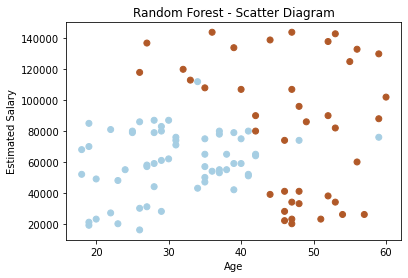

In [14]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, random_forest_predictions)
classification_rep = classification_report(y_test, random_forest_predictions)
confusion_mat = confusion_matrix(y_test, random_forest_predictions)

print('Random Forest Accuracy:', accuracy)
print('\nClassification Report:\n', classification_rep)
print('\nConfusion Matrix:\n', confusion_mat)

# Scatter diagram for Random Forest
plt.scatter(X_test[:, 0], X_test[:, 1], c=random_forest_predictions, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Random Forest - Scatter Diagram')
plt.show()

In [ ]:
#SET A 1. Write a python program to implement following classification algorithms on a given Dataset:
#iii. Kernel SVM (Use Social_Network_Ads.csv)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
[[66  2]
 [ 8 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



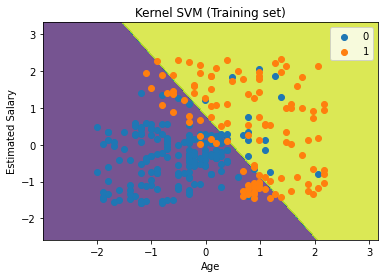

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv('Social_Network_Ads.csv')

print(data.head())


X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()


print("Classification Report:")
print(classification_report(y_test, y_pred))


X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap='viridis')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=f'C{i}', label=j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#2. Write a python program to Implement Decision Tree whether or not to play tennis. (Use Tennis.csv)

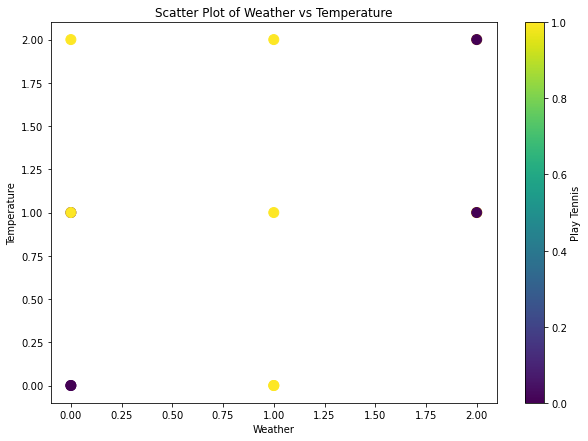

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
windy = [False, True, False, False, False, True, True, False, False, False, True, True, False, True]
play_tennis = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

weather_encoded = [0 if w == 'Sunny' else 1 if w == 'Overcast' else 2 for w in weather]
temp_encoded = [0 if t == 'Hot' else 1 if t == 'Mild' else 2 for t in temp]
humidity_encoded = [0 if h == 'High' else 1 for h in humidity]
windy_encoded = [0 if w == False else 1 for w in windy]


X = list(zip(weather_encoded, temp_encoded, humidity_encoded, windy_encoded))


y = [0 if p == 'No' else 1 for p in play_tennis]


clf = DecisionTreeClassifier()
clf = clf.fit(X, y)


plt.figure(figsize=(10, 7))
plt.scatter(weather_encoded, temp_encoded, c=y, cmap='viridis', s=100)
plt.xlabel('Weather')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Weather vs Temperature')
plt.colorbar(label='Play Tennis')
plt.show()


In [ ]:
# 3. Write a python program to implement k-Nearest Neighbors algorithm to
#build a prediction model on a given dataset (Use Social_Network_Ads.csv).

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
[[64  4]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



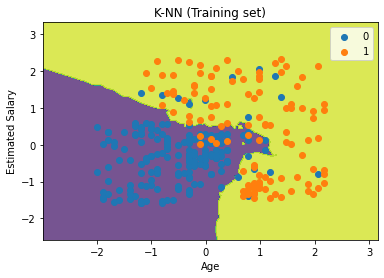

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv('Social_Network_Ads.csv')

print(data.head())

X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()


print("Classification Report:")
print(classification_report(y_test, y_pred))


X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap='viridis')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=f'C{i}', label=j)
    
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# SET B

In [ ]:
# Consider the given dataset in the User_Data.csv file:
a) Write a python program to implement k-nearest Neighbors algorithm to
build a prediction model for whether to buy an SUV car or not on a given
dataset.
b) Plot the graph to show classification.
c) Show Accuracy and Precision of the model.

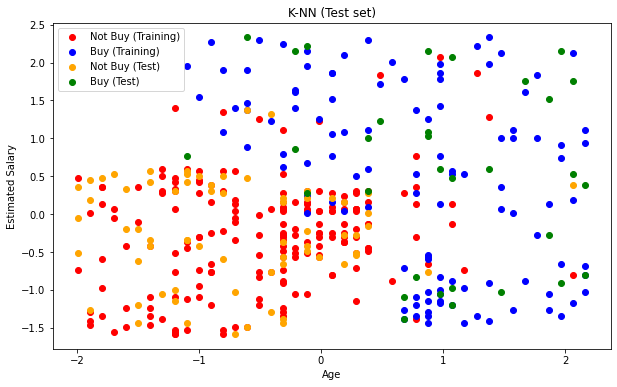

Accuracy: 0.93
Precision: 0.8787878787878788
Confusion Matrix:
[[64  4]
 [ 3 29]]


In [16]:
# PRACTISE SET B
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

# Load the dataset
data_path = '/home/fymsc28/Ass4_MLDatasets/User_Data.csv'
data = pd.read_csv(data_path)

# Separate features and target variable
X = data.iloc[:, [2, 3]].values  # considering Age and EstimatedSalary as features
y = data.iloc[:, 4].values  # SUV as target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN classifier to the training set
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Plotting the classification
plt.figure(figsize=(10, 6))

# Plotting the training points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Buy (Training)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Buy (Training)')

# Plotting the test points
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Not Buy (Test)')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='Buy (Test)')

plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Calculating accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

